In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
with open('../../spbu-ai-fundamentals/config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)

В этой теме мы поработаем с данными, посвященными определению рака молочной железы на основе различных признаков анализа клеток в биопсии (радиус, кривизна, симметрия). Известно, что этот датасет линейно разделим.

In [3]:
df = pd.read_csv(cfg["classification"]["wdbc"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Задание**: Проведите краткий EDA. Есть ли выбросы в данных, какие столбцы коррелируют больше всего, стоит ли преобразоывавть какие-то признаки? Хватит 3-4 графиков или таблиц (но можно больше).

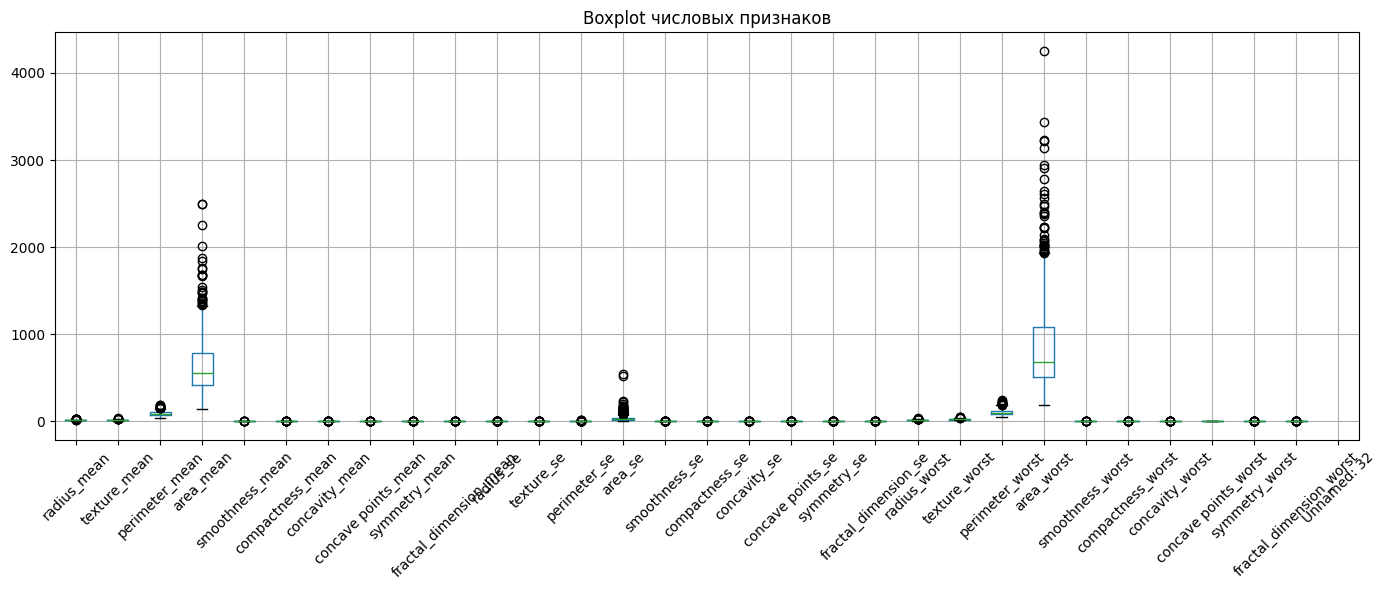

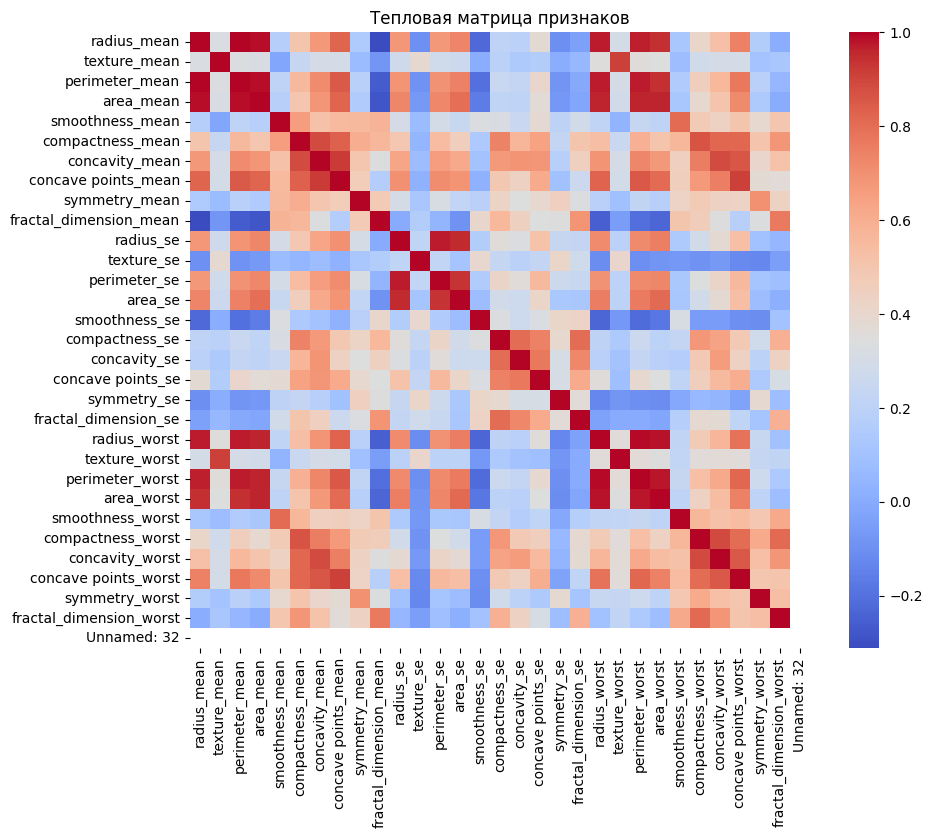

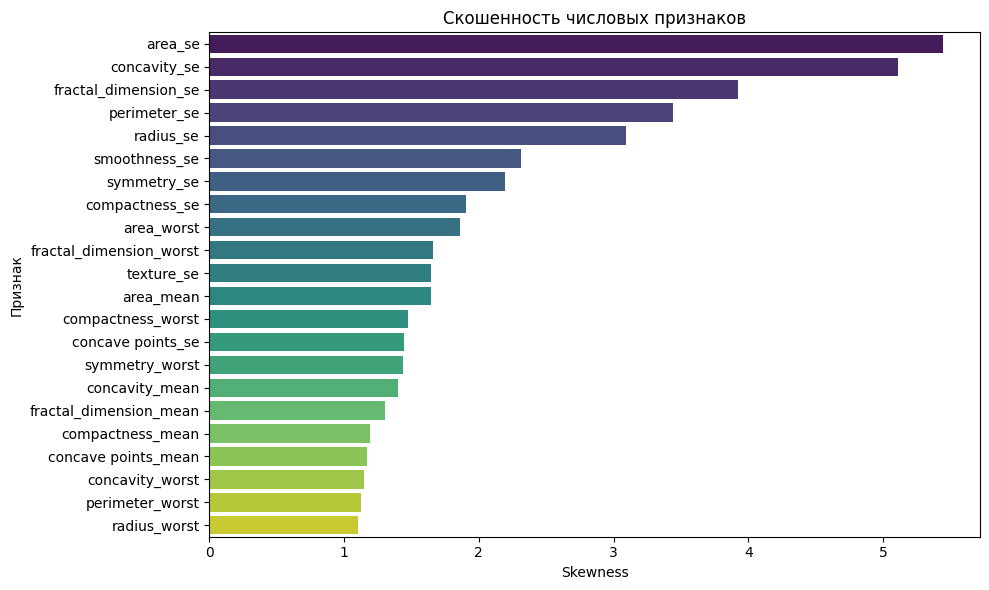

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Если id есть в данных — удалим
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# 1. Boxplot для визуализации выбросов
plt.figure(figsize=(14, 6))
df.select_dtypes(include='number').boxplot(rot=90)
plt.title('Boxplot числовых признаков')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Тепловая матрица
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая матрица признаков')
plt.show()

# 3. Анализ скошенности
skewed = df.select_dtypes(include='number').skew().sort_values(ascending=False)
skewed_df = pd.DataFrame(skewed[skewed > 1], columns=["Skewness"])

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Skewness", 
    y=skewed_df.index, 
    data=skewed_df.reset_index(), 
    hue="index", 
    palette='viridis',
    legend=False
)
plt.title('Скошенность числовых признаков')
plt.xlabel('Skewness')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

In [6]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df.head()

KeyError: "['id'] not found in axis"

In [7]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})
df.head()

C:\Users\Slava Bek\AppData\Local\Temp\ipykernel_13356\2148260181.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Задание**: выведите, сколько в датасете примеров позитивного и негативного класса.

In [8]:
target = 'diagnosis'

target = 'diagnosis'
class_counts = df[target].value_counts()

print("Количество примеров позитивного и негативного класса:")
print(class_counts)

Количество примеров позитивного и негативного класса:
diagnosis
0    357
1    212
Name: count, dtype: int64


In [9]:
features = list(df.columns)
features.remove('diagnosis')

X = df[features]
y = df[[target]]

Попробуем обучить логистическую регрессию на этих данных. Обратите внимание, что по умолчанию применяется L2 регуляризация,мы будем строить предсказания без нее. Однако, в качестве упражнения, сравним результаты с масштабированием признаков и без.

**Задание**: оцените, насколько сбалансированы признаки по масштабу. Попробуйте ответить до запуска кода, стоит ли их сначала масштабировать и почему. 

Думаю да, стоит. Так как скорее всего не все признаки изначально схожи по масштабу. А обучение модели на таких данных будет не очень качественным.

Без масштабирования:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

С масштабированием:

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values.reshape(-1), train_size=0.8, shuffle=True)
clf = LogisticRegression(penalty=None)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\Users\Slava Bek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Slava Bek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Slava Bek\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Все классификаторы в Sklearn имеют два режима - предсказание лейблов и вероятностей. Предсказание вероятностей дает нам необработанные оценки принадлежности к тому или иному классу. Модель в таком случае возвращает вектор (для каждого семпла) размера N (где N - число классов). 

**Вопрос**: Какого размера будет предсказание в случае бинарной логистической регрессии? А многоклассовой? Другими словами, в каких случаях негативный класс добавляется как отдельный?

В случае бинарной размерность будет nx2 и естетсвенно 2 класса. В случае многоклассновой nxN, где N - кол-во классов. Негативный класс добавляется как отдельный всегда.

In [12]:
df_results = pd.DataFrame({
    'pred': clf.predict(X_test).reshape(-1),
    'pred_proba': clf.predict_proba(X_test)[:, 1],
    'true': y_test.reshape(-1),
})

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**Задание**: Постройте матрицу предсказаний 100x2 для регрессии с двумя классами, где в каждой строке будут случайные значения. 
1) Получите из этого оценку принадлежности к классу с помощью сигмоиды и софтмакса. 
2) Постройте предсказание класса. В случае сигмоиды предсказывайте принадлежность к классу на основе границы, софтмакса - по максимальной вероятности

**Вопрос***: как еще можно предсказать класс? Всегда ли нужно брать именно эти функции?

In [ ]:
import numpy as np

pred_matrix = np.random.randn(100, 2)

# Функция сигмоиды для преобразования значений в вероятности
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Функция софтмакса для нормализации значений по строкам
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

sigmoid_probs = sigmoid(pred_matrix)
softmax_probs = softmax(pred_matrix)

print("Вероятности после применения сигмоиды:\n")
print(sigmoid_probs[:5], "\n")

print("Вероятности после применения софтмакса:\n")
print(softmax_probs[:5], "\n")

sigmoid_pred_class = (sigmoid_probs[:, 0] >= 0.5).astype(int)

softmax_pred_class = np.argmax(softmax_probs, axis=1)

#print("Предсказания классов по сигмоиде (используя порог 0.5):")
#print(sigmoid_pred_class)
#print("Предсказания классов по софтмаксу (на основе максимальной вероятности):")
#print(softmax_pred_class)

unique_sigmoid, counts_sigmoid = np.unique(sigmoid_pred_class, return_counts=True)
unique_softmax, counts_softmax = np.unique(softmax_pred_class, return_counts=True)

print("Распределение классов по сигмоиде:\n")
for cls, count in zip(unique_sigmoid, counts_sigmoid):
    print(f"Класс {cls}: {count} строк")
    
print("\nРаспределение классов по софтмаксу:\n")
for cls, count in zip(unique_softmax, counts_softmax):
    print(f"Класс {cls}: {count} строк")

In [ ]:
df_results.head(20)

# Метрики классификации


## Метрики на основе лейблов
Рассмотрим, какие у нас могут быть тезультаты классификации.

* TP (true positive) - правильно предсказали: рак есть, что модель и предсказала
* FP (false positive) - неправильно предсказали: рака нет,  а модель предсказала, что есть (1st order error)
* FN (false negative) - неправильно предсказали: рак вообще-то есть,  а модель предсказала, что нет (2nd order error)!
* TN (true negative) - правильно предсказали: рака нет, что модель и предсказала


Pos/Neg - общее количество объектов класса 1/0

Метрики:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$ - Доля правильных ответов
* $ \text{Error rate} = 1 -\text{accuracy}$ - Доля ошибок
* $ \text{Precision} =\frac{TP}{TP + FP}$ - Точность
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$ - Полнота
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$ F-мера (часто используют F1-меру, где $\beta=1$)

### ROC кривая

ROC кривая измеряет насколько хорошо классификатор разделяет два класса. Она построена на предсказании вероятности. Площадь под ней (ROC-AUC) является неплохой оценкой общего качества предсказаний. 
 
Пусть $y_{\rm i}$ - истинная метрка и $\hat{y}_{\rm i}$ - прогноз вероятности для $i^{\rm th}$ объекта.

Число положительных и отрицательных объектов: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$.

Для каждого порогового значения вероятности $\tau$ считаем True Positive Rate (TPR) и False Positive Rate (FPR):

\begin{equation}
TPR(\tau) = \frac{1}{I_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] = \frac{TP(\tau)}{TP(\tau) + FN(\tau)} = \frac{TP(\tau)}{Pos}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{I_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau]= \frac{FP(\tau)}{FP(\tau) + TN(\tau)} = \frac{FP(\tau)}{Neg}
\end{equation}

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Используем для сравнения случайный предикт. Иногда это не худшая стратегия. Если в данных мало сигнала, случайное предсказание может работать лучше ложного.

In [ ]:
from sklearn.dummy import DummyClassifier
random_classifier = DummyClassifier(strategy='uniform', random_state=42).fit(X_train, y_train)
y_random = random_classifier.predict_proba(X_test)[:,1]
y_random

In [ ]:
random_preds = random_classifier.predict(X_test)
random_preds

In [ ]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(11, 5))

    print(classifier_name, 'metrics')
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
    print('AUC-PR: %.4f' % average_precision_score(y_true, y_pred))
    ax[0].set_title("PRC")
    ax[0].set_ylim(0, 1.1)

    RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
    print('AUC-ROC: %.4f' % roc_auc_score(y_true, y_pred))
    ax[1].set_title("ROC")
    ax[1].set_ylim(0, 1.1)

    plt.tight_layout()
    plt.legend()


depict_pr_roc(y_test, y_random, 'Random Classifier')

Также посчитаем другие метрики на основе лейблов.

**Задание:** Дополните код по рассчету метрик.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):
    
    tp = np.sum( (y_true == 1) & (y_pred == 1) )
    fp = np.sum( (y_true == 0) & (y_pred == 1) )
    fn = np.sum( (y_true == 1) & (y_pred == 0) )
    tn = np.sum( (y_true == 0) & (y_pred == 0) )

    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [ ]:
# dataframe для сравнения методов классификации по метрикам
df_metrics = pd.DataFrame(
    columns=['acc', 'er', 'precision', 'recall', 'f1', 'auc_pr', 'roc_auc_score', 'reg_const']
)
precision, recall, _ = precision_recall_curve(y_test, y_random)

# добавление очередной строки с характеристиками метода
[tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1] = quality_metrics_report(y_test, random_preds)
df_metrics.loc['Random Classifier'] = [
      accuracy, error_rate, precision, recall, f1,
      average_precision_score(y_test, y_random),
      roc_auc_score(y_test, y_random),
      0,
]

# по аналогии результаты следующих экспериментов можно будет собрать в табличку
df_metrics

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
# Обучение логистической регрессии
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Получение предсказаний
y_pred_logreg = clf.predict(X_test)
y_pred_prob_logreg = clf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_logreg) # Получение метрик для логистической регрессии

[tp, fp, fn, tn, accuracy, error_rate, precision_val, recall_val, f1] = quality_metrics_report(y_test, y_pred_logreg)
df_metrics.loc['Logistic Regression'] = [
    accuracy, error_rate, precision_val, recall_val, f1,
    average_precision_score(y_test, y_pred_prob_logreg),
    roc_auc_score(y_test, y_pred_prob_logreg),
    0,
]

df_metrics

Согласуются ли метрики? В чем может быть проблема accuracy?

Судя по выводу, Logistic Regression имеет большую точность (acc) и меньшую ошибку (er). Возможно проблема с accuracy может быть в случае несбалансированных данных, если класс 0 встречается сильно чаще, и модель просто предсказывает его, получая высокую точность, но не решая задачу правильно. Думаю если такое произошло важнее смотреть на precision, recall, f1.

**Задание**: Соберите табличку для разных классификаторов.

**Задание**: Постройте график PR-curve, ROC-curve для лучшего из них

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Случайный лес
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

y_pred_rf = clf_rf.predict(X_test)
y_pred_prob_rf = clf_rf.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_rf)

[tp, fp, fn, tn, accuracy, error_rate, precision_val, recall_val, f1] = quality_metrics_report(y_test, y_pred_rf)
df_metrics.loc['Random Forest'] = [
    accuracy, error_rate, precision_val, recall_val, f1,
    average_precision_score(y_test, y_pred_prob_rf),
    roc_auc_score(y_test, y_pred_prob_rf),
    0,
]

# SVM
from sklearn.svm import SVC

clf_svc = SVC(probability=True)
clf_svc.fit(X_train, y_train)

y_pred_svc = clf_svc.predict(X_test)
y_pred_prob_svc = clf_svc.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_svc)

[tp, fp, fn, tn, accuracy, error_rate, precision_val, recall_val, f1] = quality_metrics_report(y_test, y_pred_svc)
df_metrics.loc['SVM'] = [
    accuracy, error_rate, precision_val, recall_val, f1,
    average_precision_score(y_test, y_pred_prob_svc),
    roc_auc_score(y_test, y_pred_prob_svc),
    0,
]

# KNN
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
y_pred_prob_knn = clf_knn.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_knn)

[tp, fp, fn, tn, accuracy, error_rate, precision_val, recall_val, f1] = quality_metrics_report(y_test, y_pred_knn)
df_metrics.loc['KNN'] = [
    accuracy, error_rate, precision_val, recall_val, f1,
    average_precision_score(y_test, y_pred_prob_knn),
    roc_auc_score(y_test, y_pred_prob_knn),
    0,
]

df_metrics

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Предсказания для k-NN
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(12, 6))

# PR-curve
plt.subplot(1, 2, 1)
plt.plot(recall_knn, precision_knn, color='b', label='PR-curve (k-NN)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# ROC-curve
plt.subplot(1, 2, 2)
plt.plot(fpr_knn, tpr_knn, color='b', label='ROC-curve (k-NN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.legend()

plt.tight_layout()
plt.show()

**Задание:** Постройте таблицу точности для набора данных wbdc. Сделайте по таблице метрик на обучающей и тестовой выборках. В таблице сравните разные преобразования признаков и гиперпараметры (регуляризацию). Можно сделать три-четыре эксперимента. 
- На каком эксперименте получилось достичь лучшего качества на трейне?
- А на тесте?
- Переобучается ли модель?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalers = {
    "None": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

C_values = [0.01, 0.1, 1, 10]
results = []

for scaler_name, scaler in scalers.items():
    for C in C_values:
        X_tr = X_train.copy()
        X_te = X_test.copy()

        if scaler:
            scaler_instance = scaler
            X_tr = scaler_instance.fit_transform(X_tr)
            X_te = scaler_instance.transform(X_te)

        model = LogisticRegression(C=C, max_iter=10000)
        model.fit(X_tr, y_train)

        # Оценка
        acc_train = accuracy_score(y_train, model.predict(X_tr))
        acc_test = accuracy_score(y_test, model.predict(X_te))

        results.append({
            "Scaler": scaler_name,
            "C": C,
            "Train Accuracy": acc_train,
            "Test Accuracy": acc_test
        })

results_df = pd.DataFrame(results)
results_df["Overfitting Gap"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]

print(results_df)

best_train = results_df.loc[results_df["Train Accuracy"].idxmax()]
best_test = results_df.loc[results_df["Test Accuracy"].idxmax()]

print(f"\nЛучшая точность на трейне: Scaler={best_train['Scaler']}, C={best_train['C']}, Точность: {best_train['Train Accuracy']:.6f}")
print(f"Лучшая точность на тесте: Scaler={best_test['Scaler']}, C={best_test['C']}, Точность: {best_test['Test Accuracy']:.6f}")

print("\nGap между train и test (чем больше, тем вероятнее переобучение):")
print(results_df[["Scaler", "C", "Overfitting Gap"]].sort_values(by="Overfitting Gap", ascending=False))